In [2]:
!nvidia-smi

Fri Oct 10 19:25:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.76                 Driver Version: 572.76         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Quadro P2000                 WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0            N/A  / 5001W |       0MiB /   4096MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0))

CUDA available: True
Device name: Quadro P2000


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

!yolo checks



Ultralytics 8.3.209  Python-3.10.11 torch-2.8.0+cu128 CUDA:0 (Quadro P2000, 4096MiB)
Setup complete  (12 CPUs, 15.8 GB RAM, 158.1/476.1 GB disk)

OS                     Windows-10-10.0.26100-SP0
Environment            Windows
Python                 3.10.11
Install                pip
Path                   C:\Users\HAI\AppData\Local\Programs\Python\Python310\Lib\site-packages\ultralytics
RAM                    15.77 GB
Disk                   158.1/476.1 GB
CPU                    Intel Core i7-8850H 2.60GHz
CPU count              12
GPU                    Quadro P2000, 4096MiB
GPU count              1
CUDA                   12.8

numpy                   2.2.6>=1.23.0
matplotlib              3.10.5>=3.3.0
opencv-python           4.12.0.88>=4.6.0
pillow                  11.3.0>=7.1.2
pyyaml                  6.0.2>=5.3.1
requests                2.32.4>=2.23.0
scipy                   1.15.3>=1.4.1
torch                   2.8.0+cu128>=1.8.0
torch                   2.8.0+cu128!=2.4.0,>=1.8.0

In [6]:
!yolo task=detect mode=train model=yolov8n.pt data=C:/Users/HAI/GUVI/Aerial_object/object_detection_Dataset/data.yaml epochs=20 imgsz=640 


Ultralytics 8.3.209  Python-3.10.11 torch-2.8.0+cu128 CUDA:0 (Quadro P2000, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/HAI/GUVI/Aerial_object/object_detection_Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

# **Python code**

In [ ]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")

# Train model
results = model.train(
    data="C:/Users/HAI/GUVI/Aerial_object/object_detection_Dataset/data.yaml",
    epochs=20,
    imgsz=640
)


## Confusion Matrix

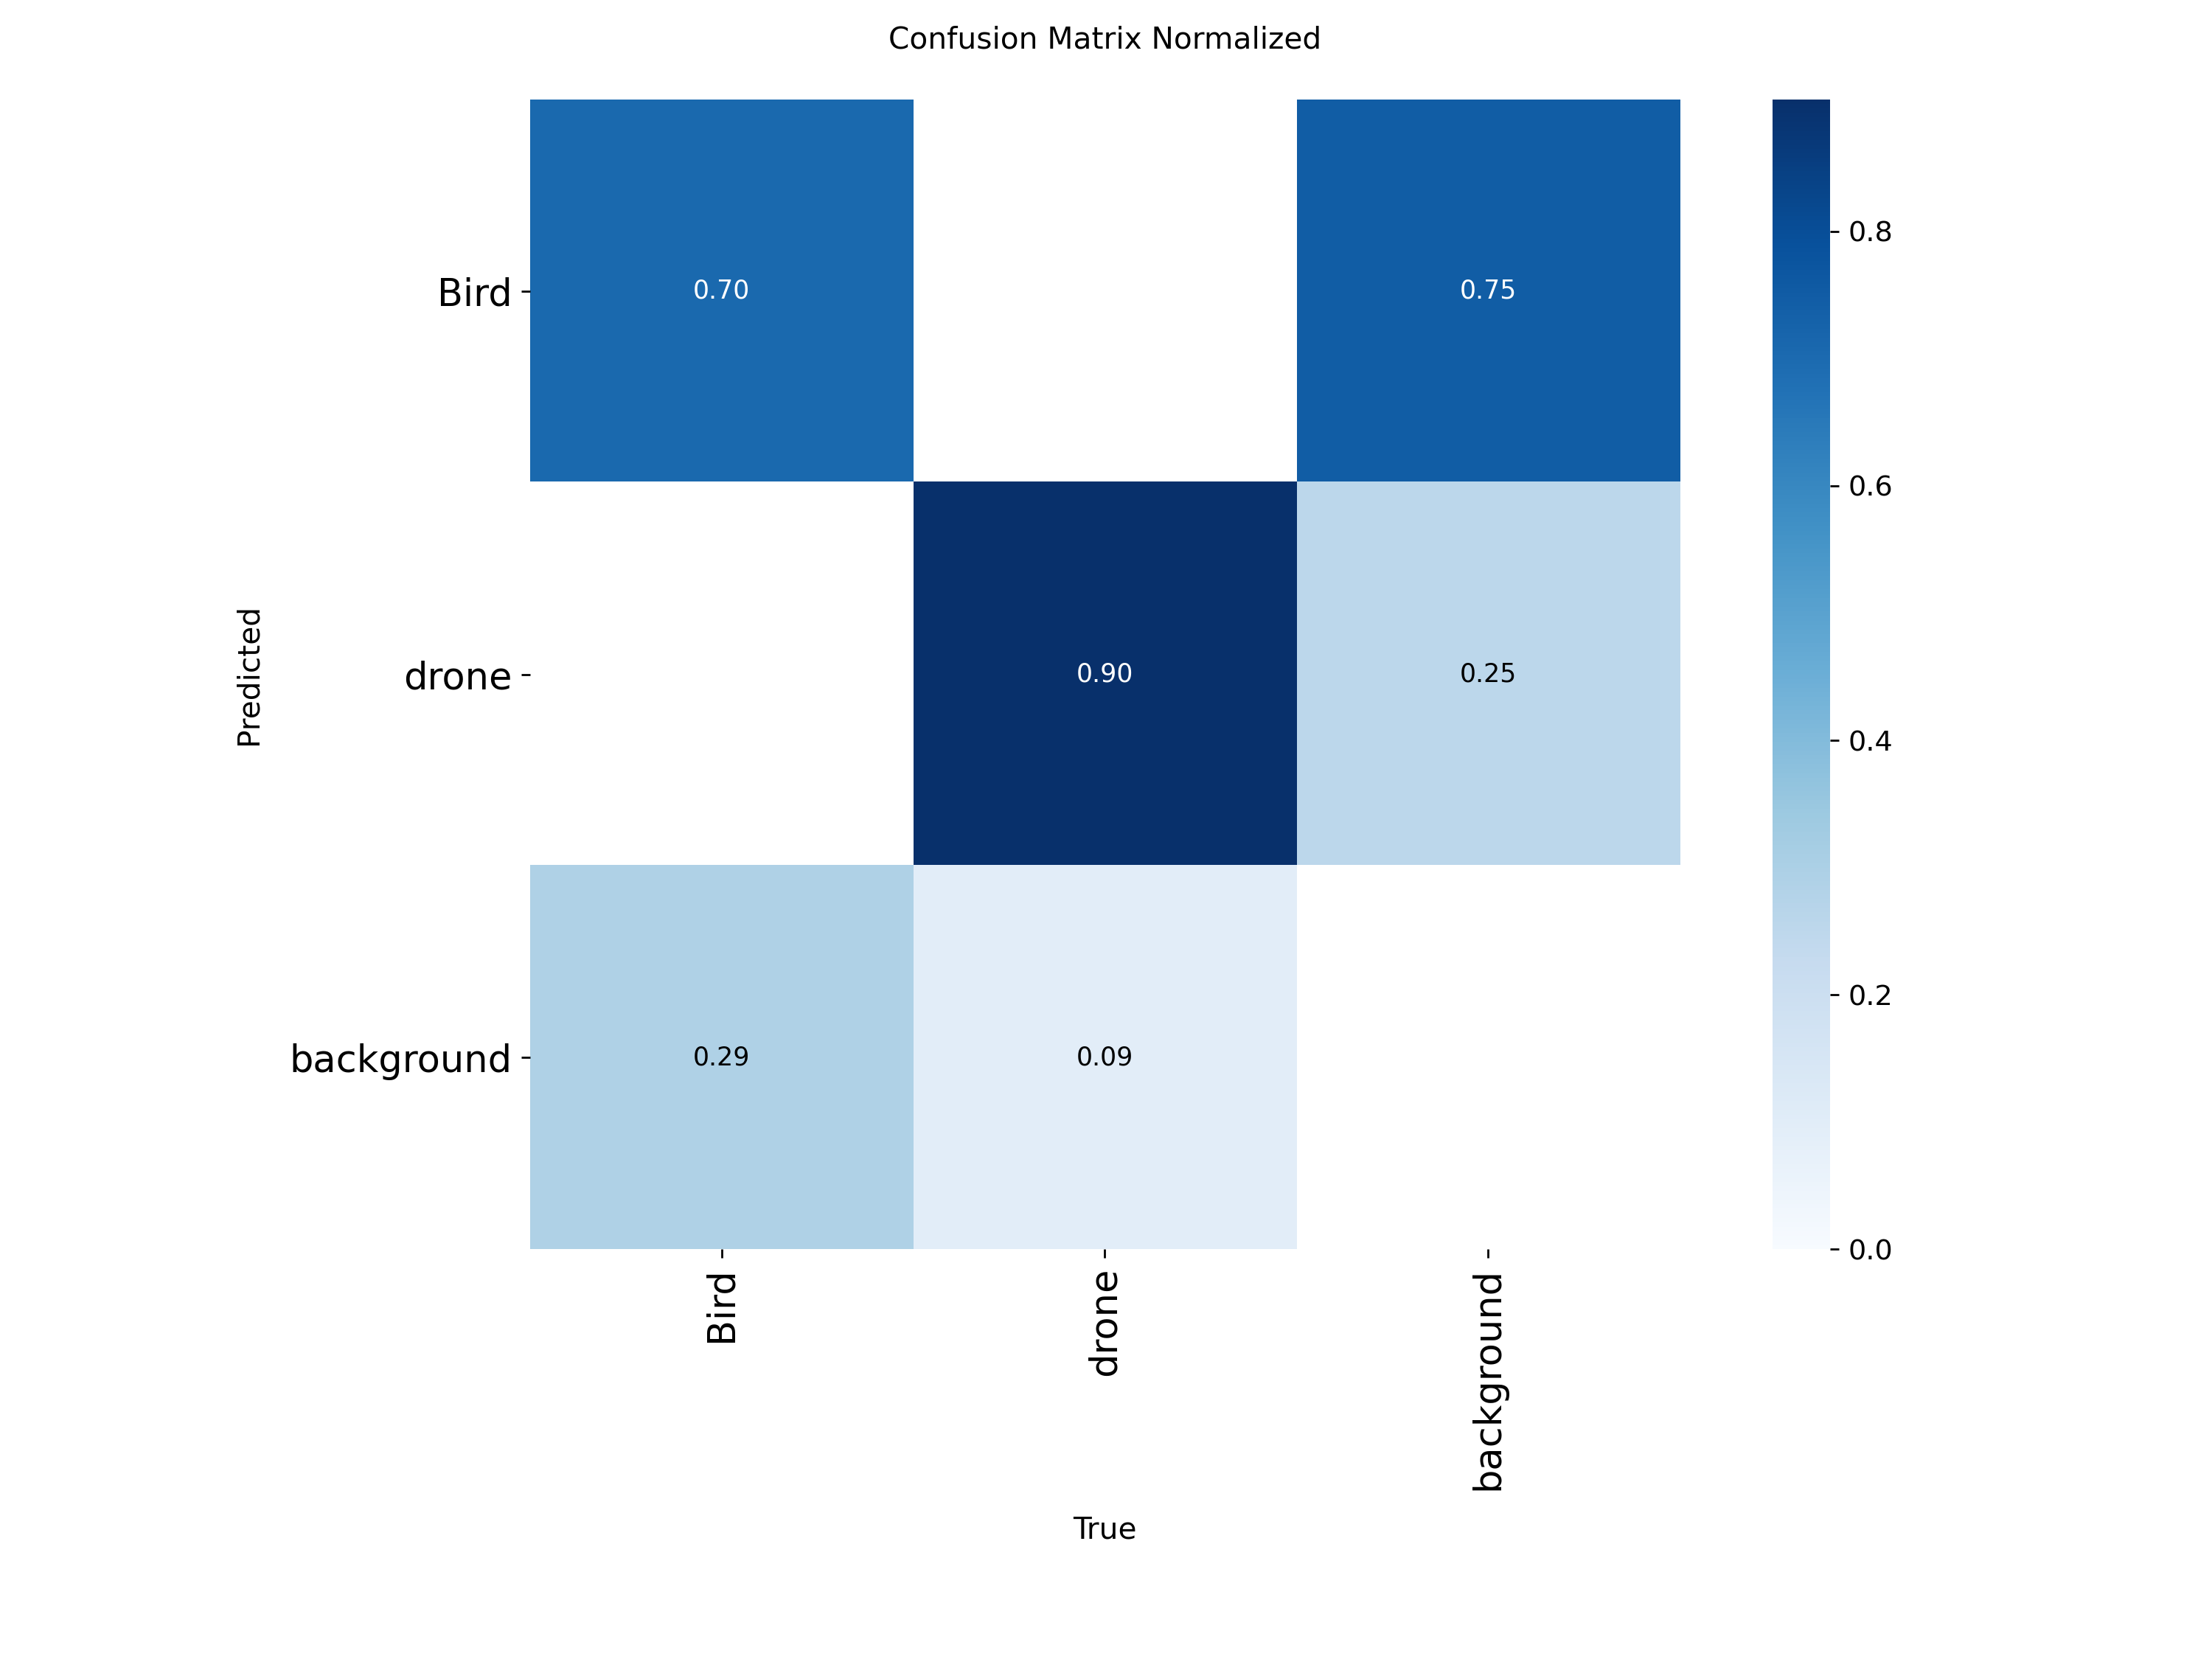

In [ ]:
Image(filename=r"C:/Users/HAI/GUVI/Aerial_object/Obj_detection/runs/detect/train/confusion_matrix_normalized.png",width=600)

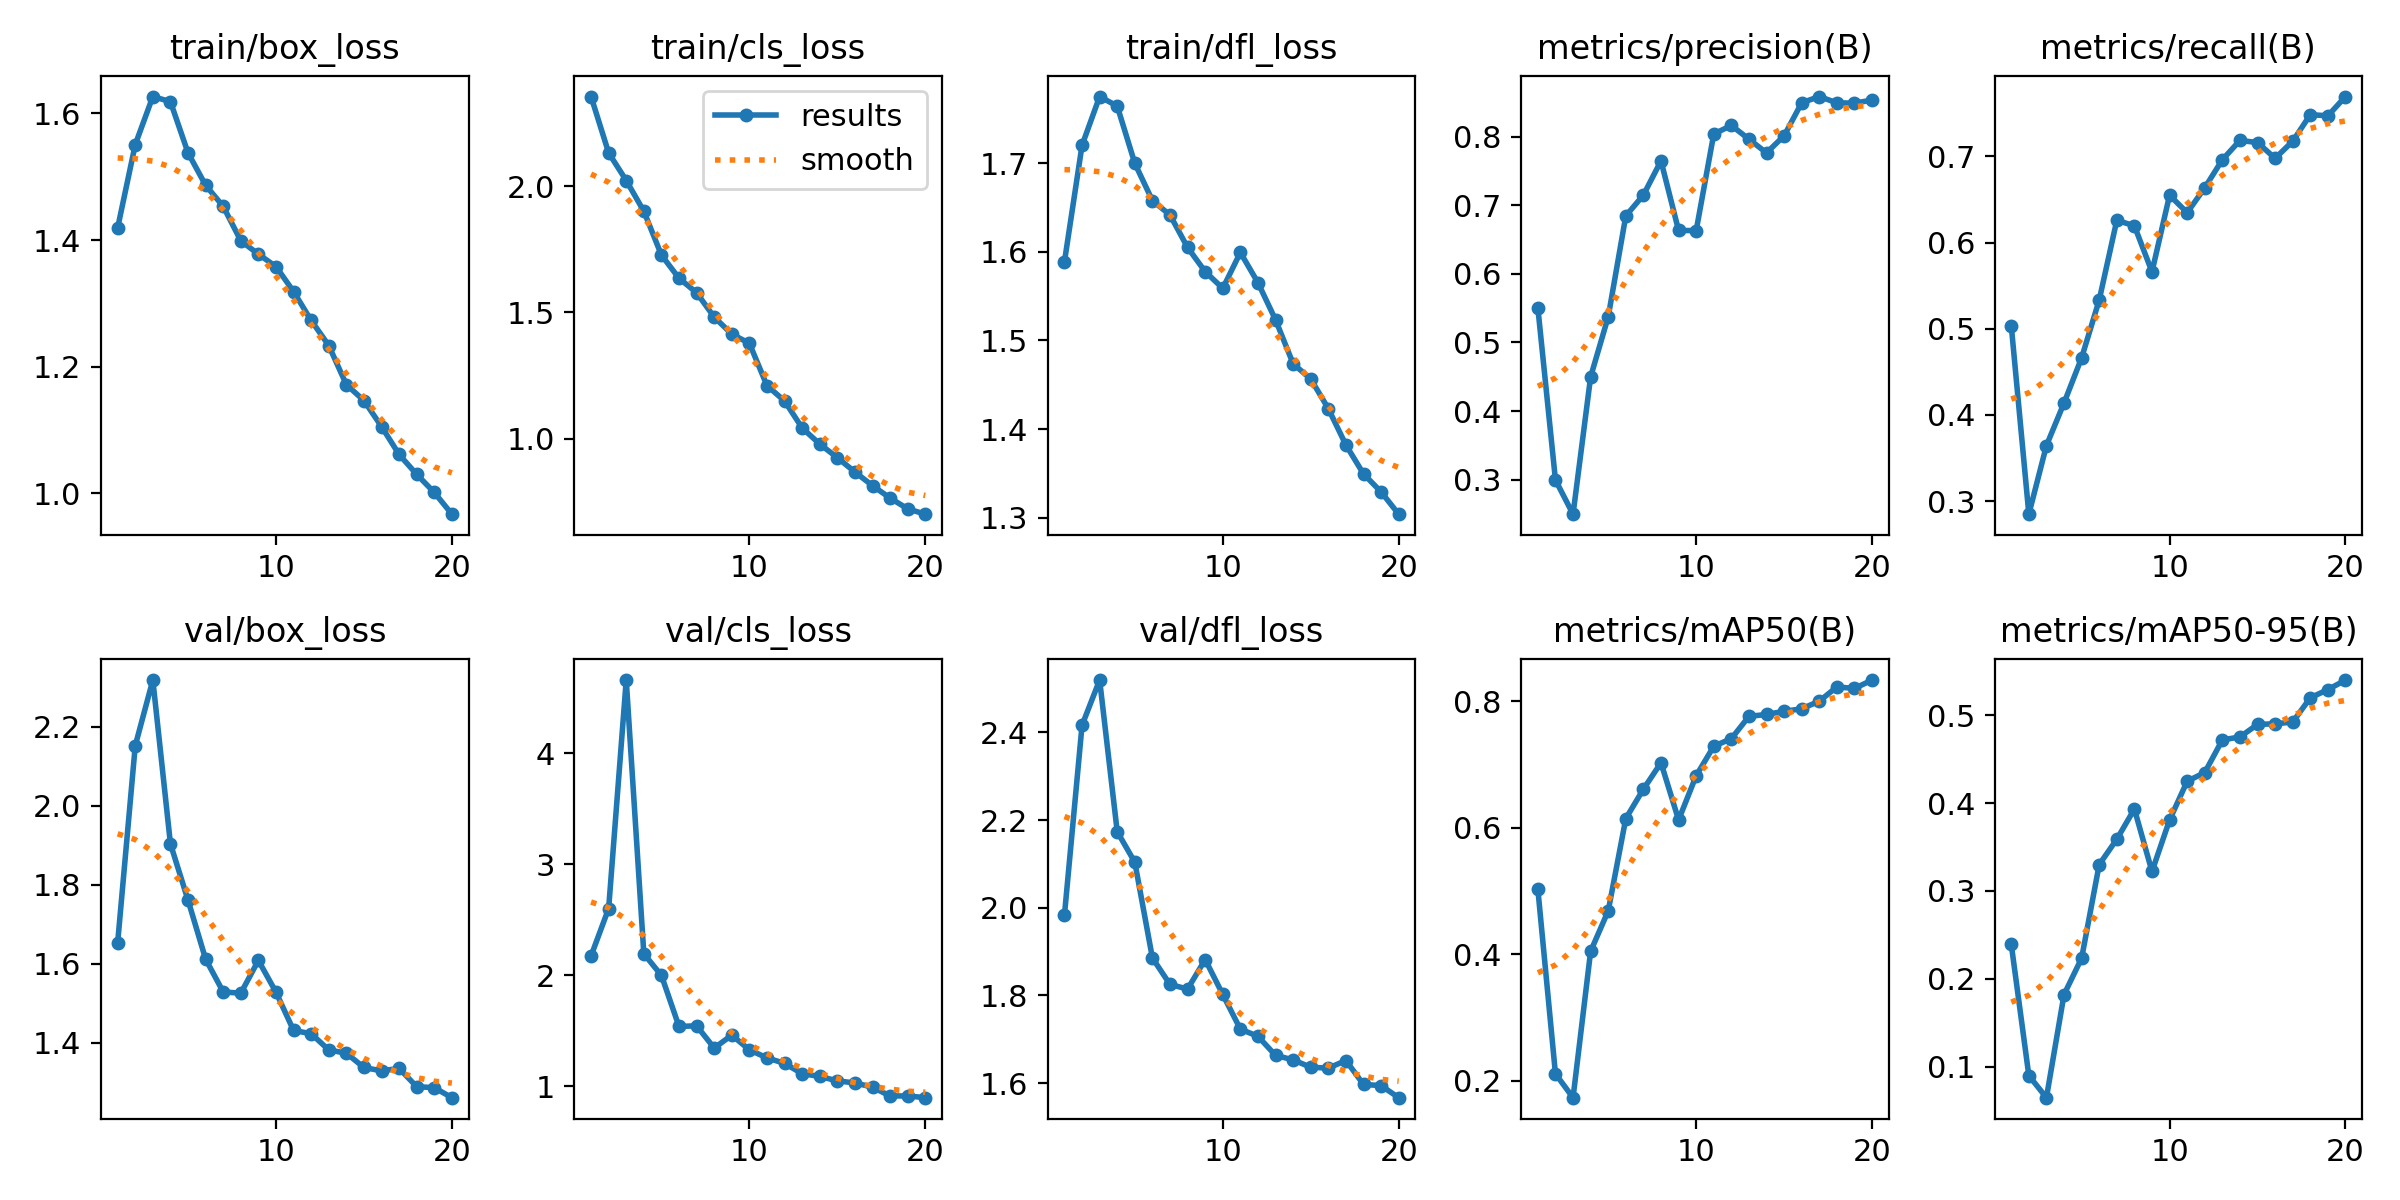

In [15]:
Image(filename= f"C:/Users/HAI/GUVI/Aerial_object/Obj_detection/runs/detect/train/results.png", width=600)

In [7]:
!yolo task=detect mode= val model= C:/Users/HAI/GUVI/Aerial_object/Obj_detection/runs/detect/train/weights/best.pt data=C:/Users/HAI/GUVI/Aerial_object/object_detection_Dataset/data.yaml imgsz=640 batch=4 device=0

Ultralytics 8.3.209  Python-3.10.11 torch-2.8.0+cu128 CUDA:0 (Quadro P2000, 4096MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 207.371.5 MB/s, size: 23.1 KB)

val: Scanning C:\Users\HAI\GUVI\Aerial_object\object_detection_Dataset\valid\labels.cache... 448 images, 6 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 448/448  0.0s
val: Scanning C:\Users\HAI\GUVI\Aerial_object\object_detection_Dataset\valid\labels.cache... 448 images, 6 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 448/448  0.0s

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 1% ──────────── 1/112 0.6it/s 0.5s<2:53
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 2% ──────────── 2/112 3.4it/s 0.6s<31.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 4% ──────────── 4/112 5.2it/s 0.8s<20.8s
                 Class     Images  I

In [8]:
!yolo task=detect mode=predict model=C:/Users/HAI/GUVI/Aerial_object/Obj_detection/runs/detect/train/weights/best.pt source=C:/Users/HAI/GUVI/Aerial_object/object_detection_Dataset/test/images/0b2724a2e00c883b_jpg.rf.99d78b8b4ce0b31ebc4c6d3ab2efd0fb.jpg conf=0.5 save=True

Ultralytics 8.3.209  Python-3.10.11 torch-2.8.0+cu128 CUDA:0 (Quadro P2000, 4096MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 C:\Users\HAI\GUVI\Aerial_object\object_detection_Dataset\test\images\0b2724a2e00c883b_jpg.rf.99d78b8b4ce0b31ebc4c6d3ab2efd0fb.jpg: 640x640 1 Bird, 10.8ms
Speed: 4.5ms preprocess, 10.8ms inference, 110.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\HAI\GUVI\Aerial_object\Obj_detection\runs\detect\predict
 Learn more at https://docs.ultralytics.com/modes/predict


Image: runs/detect/predict\0b2724a2e00c883b_jpg.rf.99d78b8b4ce0b31ebc4c6d3ab2efd0fb.jpg


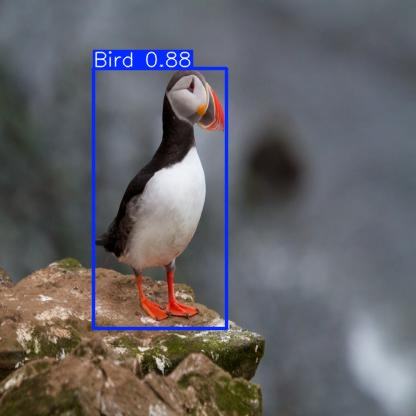

In [11]:
import glob
from IPython.display import Image, display

for img_path in glob.glob("runs/detect/predict/*.jpg"):
    print(f"Image: {img_path}")
    display(Image(filename=img_path, width=600))
    print("\n")